In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

In [2]:
DATA_FILE = "../data/20200807_user-db_cpu-load_05.json"
TARGET_DATA = {"containers": ["container_cpu_usage_seconds_total", "container_fs_reads_total", "container_fs_writes_total", "container_memory_working_set_bytes", "container_network_receive_bytes_total", "container_network_transmit_bytes_total"],
               "services": ["throughput", "latency"],
               "nodes": ["node_cpu_seconds_total", "node_disk_io_now", "node_filesystem_avail_bytes", "node_memory_MemAvailable_bytes", "node_network_receive_bytes_total", "node_network_transmit_bytes_total"]}
PLOTS_NUM = 240

raw_data = pd.read_json(DATA_FILE)
raw_data

,containers,nodes,services,mappings
carts-db,"[{'container_name': 'carts-db', 'metric_name':...",NaN,NaN,NaN
orders-db,"[{'container_name': 'orders-db', 'metric_name'...",NaN,NaN,NaN
queue-master,"[{'container_name': 'queue-master', 'metric_na...",NaN,NaN,NaN
carts,"[{'container_name': 'carts', 'metric_name': 'c...",NaN,"[{'service_name': 'carts', 'metric_name': 'thr...",NaN
payment,"[{'container_name': 'payment', 'metric_name': ...",NaN,"[{'service_name': 'payment', 'metric_name': 't...",NaN
shipping,"[{'container_name': 'shipping', 'metric_name':...",NaN,"[{'service_name': 'shipping', 'metric_name': '...",NaN
front-end,"[{'container_name': 'front-end', 'metric_name'...",NaN,"[{'service_name': 'front-end', 'metric_name': ...",NaN
session-db,"[{'container_name': 'session-db', 'metric_name...",NaN,NaN,NaN
user,"[{'container_name': 'user', 'metric_name': 'co...",NaN,"[{'service_name': 'user', 'metric_name': 'thro...",NaN
catalogue,"[{'container_name': 'catalogue', 'metric_name'...",NaN,"[{'service_name': 'catalogue', 'metric_name': ...",NaN


In [3]:
# Prepare data matrix
data_df = pd.DataFrame()
for t in raw_data["containers"].dropna():
    for metric in t:
        metric_name = metric["metric_name"].replace("container_", "")
        target_name = metric["container_name"]
        if target_name != "user-db":
            continue
        column_name = "{}-{}_{}".format("c", target_name, metric_name)
        data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][:PLOTS_NUM]
data_df

,c-user-db_fs_reads_merged_total,c-user-db_fs_reads_bytes_total,c-user-db_memory_rss,c-user-db_fs_io_time_weighted_seconds_total,c-user-db_memory_max_usage_bytes,c-user-db_sockets,c-user-db_fs_io_time_seconds_total,c-user-db_memory_mapped_file,c-user-db_memory_cache,c-user-db_memory_swap,...,c-user-db_fs_io_current,c-user-db_fs_usage_bytes,c-user-db_cpu_user_seconds_total,c-user-db_network_transmit_packets_total,c-user-db_memory_failcnt,c-user-db_fs_limit_bytes,c-user-db_fs_sector_reads_total,c-user-db_network_transmit_errors_total,c-user-db_spec_memory_reservation_limit_bytes,c-user-db_network_receive_packets_dropped_total
0,0.0,0.000000,33890304.0,0.0,134537216.0,0.0,0.0,0.0,323584.0,0.0,...,0.0,307200.0,0.011833,93.992635,0.0,1.012413e+11,0.0,0.0,0.0,0.0
1,0.0,0.000000,33890304.0,0.0,134537216.0,0.0,0.0,0.0,323584.0,0.0,...,0.0,307200.0,0.011889,113.488437,0.0,1.012413e+11,0.0,0.0,0.0,0.0
2,0.0,0.000000,33890304.0,0.0,134537216.0,0.0,0.0,0.0,323584.0,0.0,...,0.0,307200.0,0.011926,119.762629,0.0,1.012413e+11,0.0,0.0,0.0,0.0
3,0.0,0.000000,33890304.0,0.0,134537216.0,0.0,0.0,0.0,323584.0,0.0,...,0.0,307200.0,0.015170,132.153338,0.0,1.012413e+11,0.0,0.0,0.0,0.0
4,0.0,0.000000,33890304.0,0.0,134537216.0,0.0,0.0,0.0,323584.0,0.0,...,0.0,307200.0,0.016466,150.914601,0.0,1.012413e+11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.0,0.000000,34844672.0,0.0,134537216.0,0.0,0.0,1351680.0,24211456.0,0.0,...,0.0,11890688.0,0.539635,112.148445,0.0,1.012413e+11,0.0,0.0,0.0,0.0
236,0.0,1810.426750,34979840.0,0.0,134537216.0,0.0,0.0,1351680.0,24211456.0,0.0,...,0.0,11894784.0,0.773719,110.526316,0.0,1.012413e+11,0.0,0.0,0.0,0.0
237,0.0,2259.924412,34979840.0,0.0,134537216.0,0.0,0.0,1351680.0,24211456.0,0.0,...,0.0,11894784.0,0.783470,108.581274,0.0,1.012413e+11,0.0,0.0,0.0,0.0
238,0.0,1643.231099,34979840.0,0.0,134537216.0,0.0,0.0,1351680.0,24211456.0,0.0,...,0.0,11894784.0,0.775881,108.722871,0.0,1.012413e+11,0.0,0.0,0.0,0.0


In [4]:
containers_list = []
for col in data_df.columns:
    container_name = col.split("_")[0].replace("c-", "")
    if container_name not in containers_list:
        containers_list.append(container_name)
containers_list

['user-db']

In [5]:
n_nodes_total_before = 0
n_nodes_total_after = 0
for container in containers_list:
    df = data_df.loc[:, data_df.columns.str.startswith("c-{}_".format(container))]
    n_nodes_before = len(df.columns)
    n_nodes_total_before += n_nodes_before
    for column in df.columns:
        data = df[column].values
        mean = data.mean()
        std = data.std()
        if mean == 0. and std == 0.:
            cv = 0
        else:
            cv = std / mean
        if cv <= 0.001:
            df = df.drop(column, axis=1)
    n_nodes_after = len(df.columns)
    n_nodes_total_after += n_nodes_after
    print("{}: {}->{}".format(container, n_nodes_before, n_nodes_after))
print("=====================")
print("Total: {}->{}".format(n_nodes_total_before, n_nodes_total_after))

user-db: 51->19
Total: 51->19


In [6]:
normalized_df = pd.DataFrame()
for column in data_df.columns:
    data = data_df[column].values
    mean = data.mean()
    std = data.std()
    if mean == 0. and std == 0.:
        cv = 0
    else:
        cv = std / mean
    if cv >= 0.001:
        print("{:.2f}:{}".format(np.nan_to_num(cv), column))
        normalized_df[column] = data_df[column] / data.mean()

6.67:c-user-db_fs_reads_bytes_total
0.06:c-user-db_memory_rss
2.92:c-user-db_memory_mapped_file
2.39:c-user-db_memory_cache
2.81:c-user-db_cpu_system_seconds_total
0.15:c-user-db_network_receive_packets_total
0.17:c-user-db_memory_working_set_bytes
0.86:c-user-db_network_receive_bytes_total
2.55:c-user-db_cpu_usage_seconds_total
1.49:c-user-db_fs_inodes_total
0.23:c-user-db_memory_usage_bytes
6.08:c-user-db_fs_writes_bytes_total
0.87:c-user-db_fs_writes_total
6.95:c-user-db_fs_reads_total
0.14:c-user-db_network_transmit_bytes_total
5.94:c-user-db_memory_failures_total
2.19:c-user-db_fs_usage_bytes
2.73:c-user-db_cpu_user_seconds_total
0.14:c-user-db_network_transmit_packets_total


<AxesSubplot:>

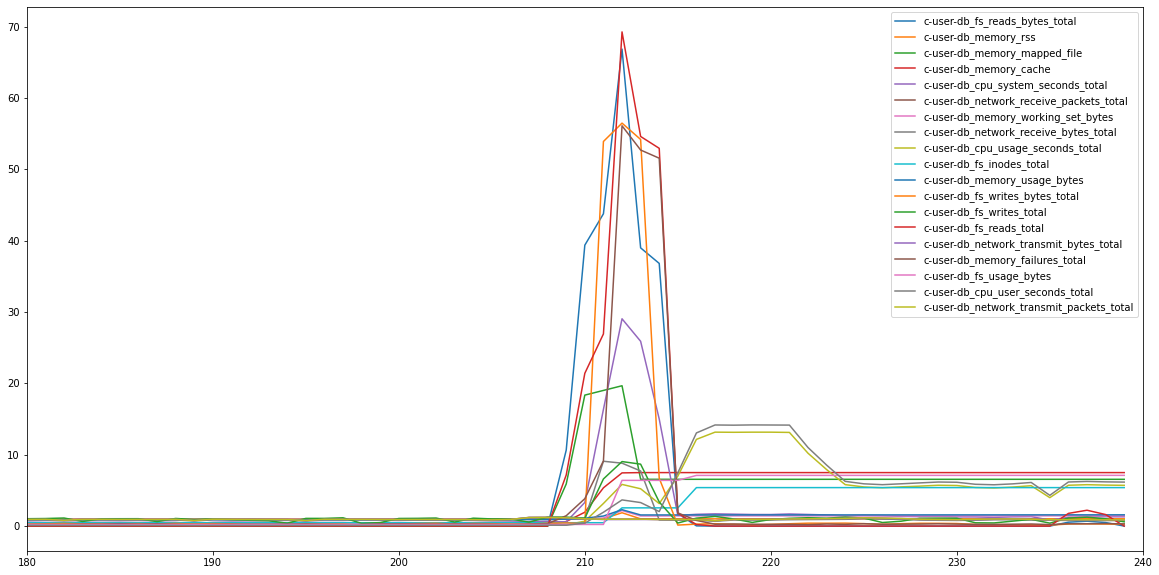

In [7]:
normalized_df.plot(figsize=(20, 10), xlim=[180,240])

<AxesSubplot:>

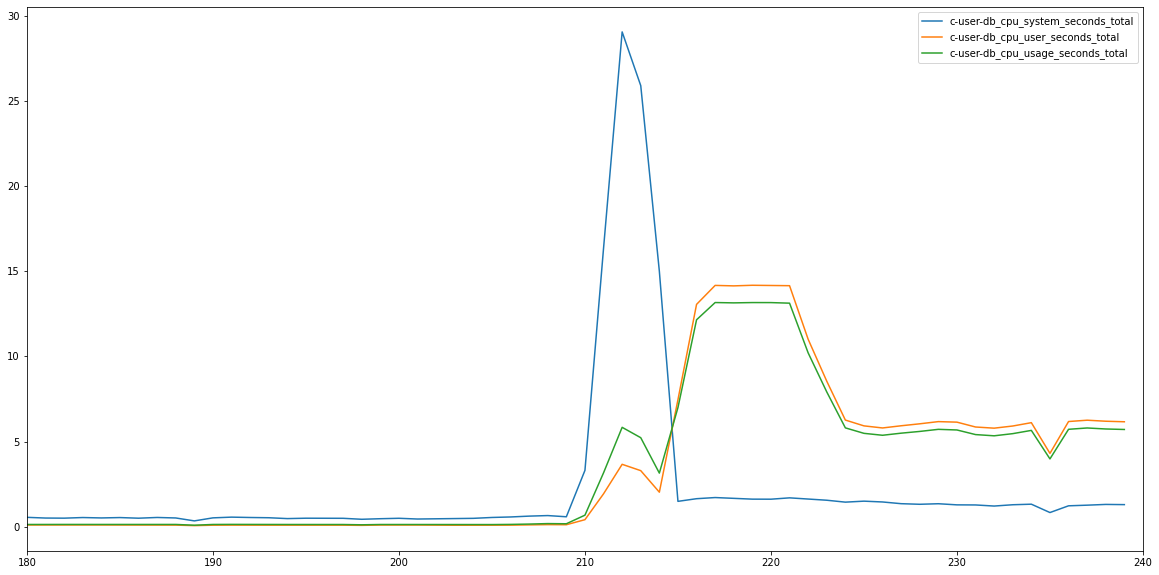

In [6]:
df = pd.DataFrame()
cpu_mets = ["c-user-db_cpu_system_seconds_total", "c-user-db_cpu_user_seconds_total", "c-user-db_cpu_usage_seconds_total"]
for m in cpu_mets:
    df[m] = normalized_df[m]
df.plot(figsize=(20, 10), xlim=[180,240])

In [51]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

dist_matrix = np.zeros((len(normalized_df.columns),len(normalized_df.columns)))
for i, c1 in enumerate(normalized_df.columns):
    for j, c2 in enumerate(normalized_df.columns):
        if i!=j and dist_matrix[i][j] == 0.:
            dist, _ = fastdtw(normalized_df[c1].values, normalized_df[c2].values, dist=euclidean)
            dist_matrix[i][j] = dist
dist_matrix.shape

(19, 19)

<AxesSubplot:>

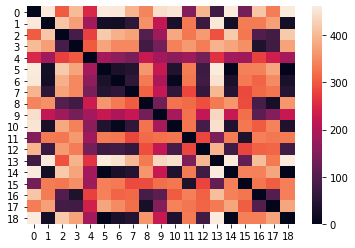

In [52]:
sns.heatmap(dist_matrix)

In [46]:
pairs = []
cols = normalized_df.columns
for i, row in enumerate(dist_matrix):
    for j, dist in enumerate(row):
        if i != j and i < j and dist < 30:
            pairs.append((cols[i], cols[j]))

In [47]:
pairs

[('c-user-db_memory_rss', 'c-user-db_network_receive_packets_total'),
 ('c-user-db_memory_rss', 'c-user-db_memory_working_set_bytes'),
 ('c-user-db_memory_rss', 'c-user-db_network_transmit_bytes_total'),
 ('c-user-db_memory_rss', 'c-user-db_network_transmit_packets_total'),
 ('c-user-db_network_receive_packets_total',
  'c-user-db_network_transmit_bytes_total'),
 ('c-user-db_network_receive_packets_total',
  'c-user-db_network_transmit_packets_total'),
 ('c-user-db_memory_working_set_bytes', 'c-user-db_memory_usage_bytes'),
 ('c-user-db_cpu_usage_seconds_total', 'c-user-db_cpu_user_seconds_total'),
 ('c-user-db_network_transmit_bytes_total',
  'c-user-db_network_transmit_packets_total')]

<AxesSubplot:>

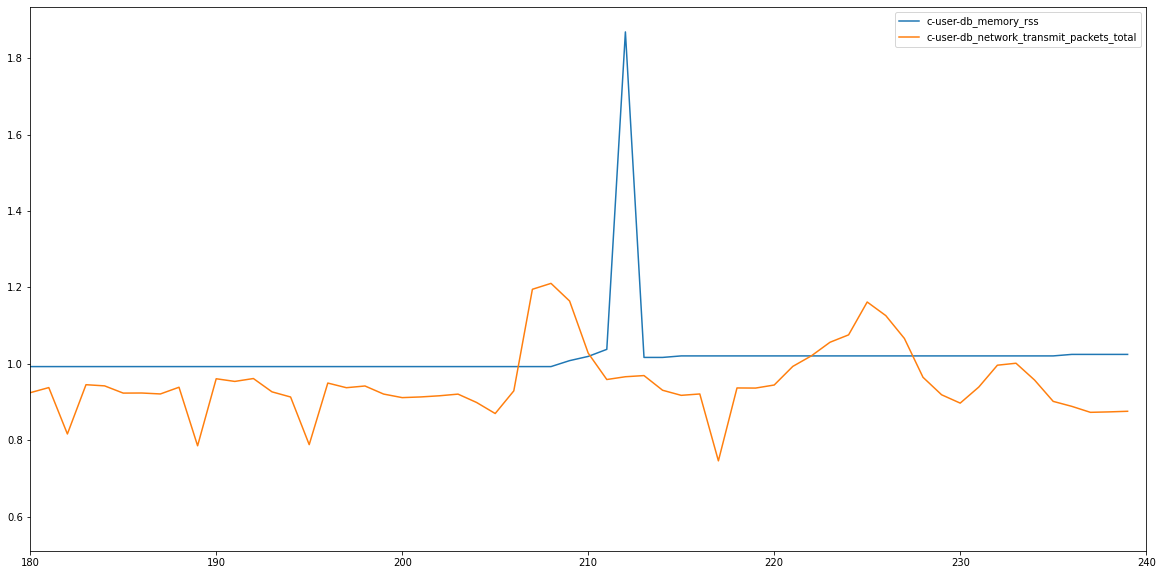

In [55]:
df = pd.DataFrame()
cpu_mets = ["c-user-db_memory_rss", "c-user-db_network_transmit_packets_total"]
for m in cpu_mets:
    df[m] = normalized_df[m]
df.plot(figsize=(20, 10), xlim=[180,240])

In [10]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

In [11]:
arr = normalized_df.values.T
arr.shape

(19, 240)

In [28]:
ts_dataset = to_time_series_dataset(arr)
ts_dataset = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(ts_dataset)
ts_dataset.shape

(19, 240, 1)

In [59]:
ks = KShape(n_clusters=2)
ks.fit(ts_dataset)

KShape(n_clusters=2)

In [60]:
ks.labels_

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [61]:
ks.inertia_

0.030113545855705814

In [ ]:
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(data_train[:,0], rs)
print("調整ランド指標 : ",ars)

In [67]:
sys.path.append("../")
from kshape.kshape import kshape

In [76]:
kshape(arr, 18)

[(array([-0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.34215296, -0.34215296, -0.34215296,
         -0.34215296, -0.34215296, -0.